In [1]:
import sys
if '..' not in sys.path:
    sys.path.append('..')

In [2]:
import tensorflow as tf
from ultrayolo import YoloV3, datasets
from ultrayolo.helpers import draw
from pathlib import Path
import numpy as np
import logging

from matplotlib import patches
import matplotlib.pyplot as plt

# Predict using a custom Model

The classes contained in the dataset

In [3]:
classes_dict = datasets.load_classes('./custom_classes.txt', True)
target_shape = (512, 512, 3)
max_objects = 100
num_classes = len(classes_dict)
print(f'number of classes {num_classes}')
classes_dict

number of classes 5


{0: 'book',
 1: 'bus',
 2: 'car',
 3: 'motorcycle',
 4: 'vehicle registration plate'}

In [9]:
model = YoloV3(target_shape, max_objects,
               num_classes=num_classes, score_threshold=0.7, iou_threshold=0.7, 
               training=False, backbone='DarkNet')

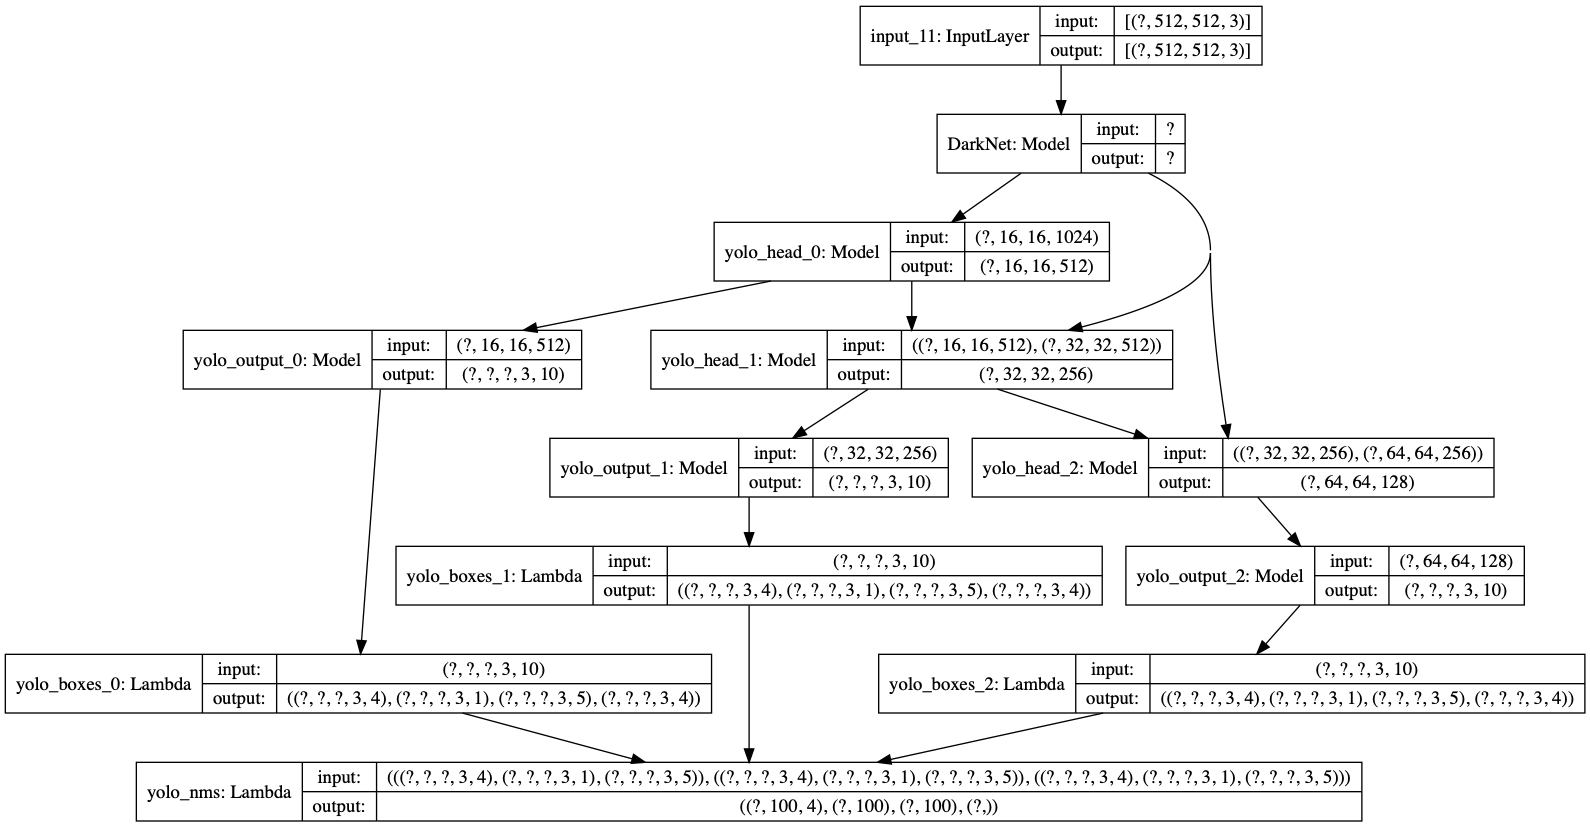

In [11]:
tf.keras.utils.plot_model(model.model, show_shapes=True)

## Load the weights

load a custom model from [here](add a valid link here)

In [12]:
w_path = Path('./weights.117-9.932.h5')
# w_path = Path('./weights.h5')
model.load_weights(w_path)

 62375 MainThread loading checkpoint from /Users/fumarolaf/git/tfyolo3/notebooks/weights.117-9.932.h5


## Predict

we predict the objects using an image from the web. You can try with your.

### Download an image

In [19]:
img = datasets.open_image('https://c8.staticflickr.com/4/3901/14855908765_8bdda9130b_z.jpg')
# img = datasets.open_image('https://lh6.googleusercontent.com/proxy/Jo961aR6HemjY-D0TKiVEkVlI7b84uTkfJHSFBCz4UN2maJidjYVznbPrxDpRDd6wlbqn80ZmP_ohdCPkE9syrVJPIjiYvgbo9ovRAArlFC_9Sm4V3NZi--R')
img_pad = datasets.pad_to_fixed_size(img, target_shape)
img_resized = datasets.resize(img, target_shape)
#preprocess the image
x = np.divide(img_pad, 255.)
x = np.expand_dims(x, 0)
x.shape

(1, 512, 512, 3)

### Perform the prediction

In [20]:
boxes, scores, classes, sel = model.predict(x)
print(f'found {sel[0]} objects')

found 3 objects


Uncomment the cells below to see what the model returns

### Show the image with the discovered objects

car 0.97570795
car 0.9543877
car 0.83372337


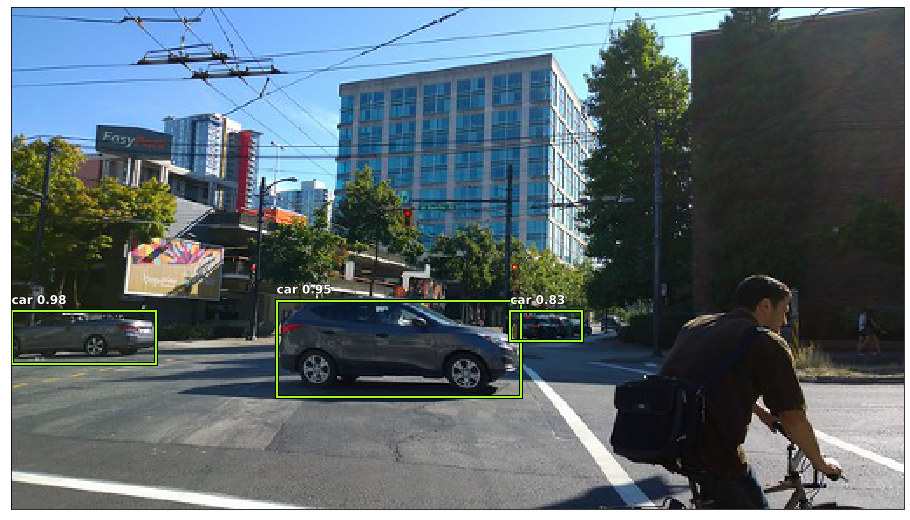

In [21]:
ax = draw.show_img(img_resized, figsize=(16,10))
for i,b in enumerate(boxes[0,:sel[0]]):
    draw.rect(ax, b, color='#9cff1d')
    name_score = f'{classes_dict[classes[0, i]]} {str(round(scores[0,i],2))}'
    draw.text(ax, b[:2], name_score, sz=12)
    print(classes_dict[classes[0, i]], scores[0,i])
    
plt.show()